# Problem Solving with Algorithms and Data Structures using Python
## Chapter 3. Analysis - Algorithm analysis
### Programming Exercises



####  1. Devise an experiment to verify that the list index operator is O(1)



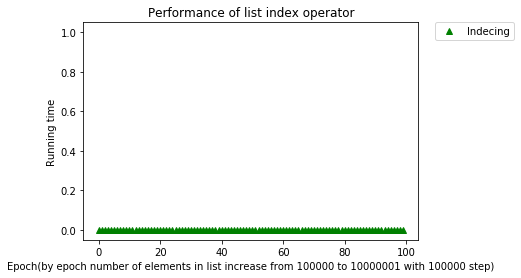

In [122]:
from timeit import Timer
import matplotlib.pyplot as plt

    
time = []

list_initial_len = 100000
list_final_len = 10000001
increase_len_step = 100000

for i in range(list_initial_len,list_final_len, increase_len_step):   
    
    x = list(range(i))
    indexingTimer =Timer("x[random.randrange(%d)]" % i,
                     "from __main__ import random,x")
     
    time.append(indexingTimer.timeit(number=1000))  
    

plt.plot(1, "b-")
plt.plot(time, 'g^', label="Indecing")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel('Running time')
plt.xlabel(f'Epoch(by epoch number of elements in list increase from {list_initial_len} to {list_final_len} with {increase_len_step} step)')
plt.title('Performance of list index operator')
plt.ylabel('Running time')
plt.show()

#### 2. Devise an experiment to verify that get item and set item are O(1) for dictionaries.

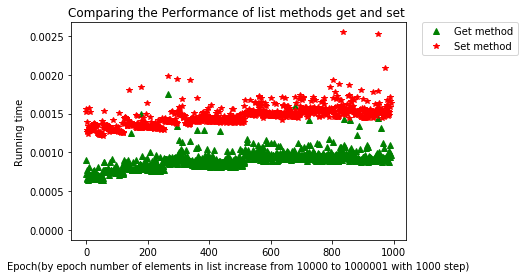

In [127]:
import timeit
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

get_time=[]
set_time=[]

dict_initial_len = 10000
dict_final_len = 1000001
increase_len_step = 1000

for i in range(dict_initial_len,dict_final_len, increase_len_step):   
    get_timer = timeit.Timer("x.get(random.randrange(%d))" % i,
                     "from __main__ import random,x")
    set_timer = timeit.Timer("x[random.randrange(%d)]=random.randrange(10)" % i,
                     "from __main__ import random,x")
    
    x = {j: None for j in range(i)}
    
    get_time.append(get_timer.timeit(number=1000))
    set_time.append(set_timer.timeit(number=1000))
    

#visualization 
plt.plot(0, "b-")
plt.plot(get_time, 'g^', label="Get method")
plt.plot(set_time, 'r*', label="Set method")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel('Running time')
plt.xlabel(f'Epoch(by epoch number of elements in list increase from {dict_initial_len} to {dict_final_len} with {increase_len_step} step)')
plt.title('Comparing the Performance of list methods get and set ')

plt.show()

#### 3. Devise an experiment that compares the performance of the del operator on lists and dictionaries.

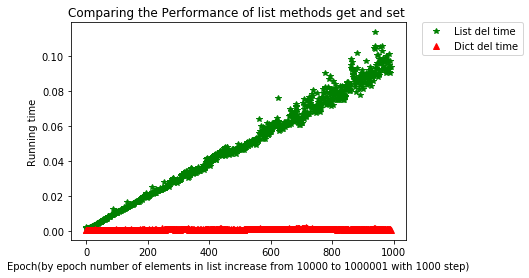

In [128]:
import timeit
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def del_dict_items(x):
# Insert the index
    random_index = random.randrange(len(x) - 1)
    try:
        del x[random_index]
    except KeyError:
        x.setdefault(random_index, None)
        del x[random_index]

        
list_del_time = []
dict_del_time = []  

collect_initial_len = 10000
collect_final_len = 1000001
increase_len_step = 1000

for i in range(collect_initial_len, collect_final_len, increase_len_step):
    t_list = timeit.Timer("del x[random.randrange(len(x)-1)]", "from __main__ import random, x")
    t_dict = timeit.Timer("del_dict_items(x)", "from __main__ import random, x, del_dict_items")
    x = list(range(i))
    list_del_time.append(t_list.timeit(number=1000))
    x = dict.fromkeys(range(i))
    dict_del_time.append(t_dict.timeit(number=1000))
    
    

plt.plot(list_del_time, 'g*', label="List del time")
plt.plot(dict_del_time, 'r^', label="Dict del time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel('Running time')
plt.xlabel(f'Epoch(by epoch number of elements in list increase from {collect_initial_len} to {collect_final_len} with {increase_len_step} step)')
plt.title('Comparing the Performance of list methods get and set ')
plt.show()

#### 4. Given a list of numbers in random order, write an algorithm that works in O(nlog(n)) to find the kth smallest number in the list.

In [147]:
import random
random_list = [random.randint(1,100) for x in range(10)]

#testList =[20, 74, 44, 57, 33, 44, 96, 60, 17, 43]


def find_kth_smallest_with_sort(k, given_list):
    'Function helps find kth smallest number in the list use sort() method'
    given_list.sort()
    return given_list[k-1]
  
k= input("Enter k: ")    
print(f'The {k}th smallest number in the list {randomlist} is {findKthSmallestWithSort(int(k), randomlist)}')


Enter k: 4
The 4th smallest number in the list [5, 16, 17, 50, 58, 65, 85, 92, 100] is 50


#### Modification ex.4 an algorithm that works in O(n) to find the kth smallest number in the list.


In [23]:
#Usage of Quick sort


import random

randomlist = [random. randint(1,100) for x in range(10)]
#testList =[20, 74, 44, 57, 33, 44, 96, 60, 17, 43]

def quickSort(givenlist):
    length = len(givenlist)
    if length<=1:
        return givenlist
    
    else:
        pivot = givenlist.pop()
        
        
    rigth_list=[]
    left_list=[]
    
    for item in givenlist:
        if item>=pivot:
            rigth_list.append(item)
        else: left_list.append(item)
    
    return quickSort(left_list)+[pivot]+quickSort(rigth_list)
            
def find_kth_smallest_with_quick_sort(k, given_list):
    if k<=len(given_list):
        return quickSort(given_list)[k-1]
    else:
        raise RuntimeError(str(k)+ ' is greater than len(list)')
    
    
k= int(input("Enter k: "))   
#k=random.randint(1,11)
print(f'The {k}th smallest number in the list {randomlist} is {find_kth_smallest_with_quick_sort(k, randomlist)}')



Enter k: 1
The 1th smallest number in the list [25, 88, 18, 30, 90, 96, 86, 13, 5, 69] is 5


#### An experiment that compares the performance of quickSort and sort list method.

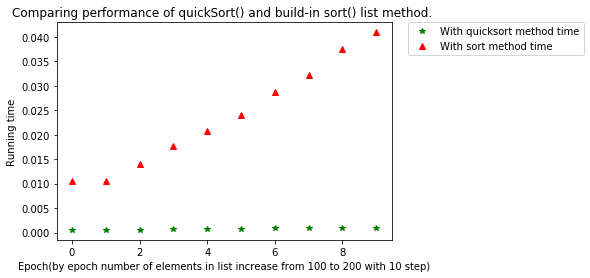

In [16]:
import timeit
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


def quickSort(givenlist):
    length = len(givenlist)
    if length<=1:
        return givenlist
    
    else:
        pivot = givenlist.pop()
        
        
    rigth_list=[]
    left_list=[]
    
    for item in givenlist:
        if item>=pivot:
            rigth_list.append(item)
        else: left_list.append(item)
    
    return quickSort(left_list)+[pivot]+quickSort(rigth_list)
            
def find_kth_smallest_with_quick_sort(k, given_list):
    if k<=len(given_list):
        return quickSort(given_list)[k-1]
    else:
        raise RuntimeError(str(k)+ ' is greater than len(list)')




time_quick_sort = []
time_sort = []  

list_initial_len = 100
list_final_len = 200
increase_len_step = 10


for i in range(list_initial_len, list_final_len, increase_len_step):
    
    t_sort= timeit.Timer("x.sort()", "from __main__ import  x, k")
    t_quick_sort= timeit.Timer("quickSort(x)", "from __main__ import k, x, quickSort")
    
    x = [random.randint(1,100) for x in range(i)]
    k=random.randint(1,10)
    
    time_sort.append(t_sort.timeit(number=1000))
    time_quick_sort.append(t_quick_sort.timeit(number=1000))

plt.plot(time_sort, 'g*', label="With quicksort method time")
plt.plot(time_quick_sort, 'r^', label="With sort method time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel('Running time')
plt.xlabel(f'Epoch(by epoch number of elements in list increase from {list_initial_len} to {list_final_len} with {increase_len_step} step)')
plt.title('Comparing performance of quickSort() and build-in sort() list method. ')
plt.show()

#### An experiment that compares the performance of find_kth_smallest_with_sort and find_kth_smallest_with_quick_sort.

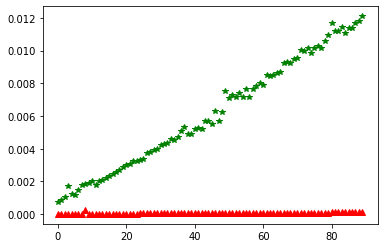

In [25]:
import timeit
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def find_kth_smallest_with_sort(k, given_list):
    'Function helps find kth smallest number in the list use sort() method'
    given_list.sort()
    return given_list[k-1]

def quickSort(givenlist):
    length = len(givenlist)
    if length<=1:
        return givenlist
    
    else:
        pivot = givenlist.pop()
        
        
    rigth_list=[]
    left_list=[]
    
    for item in givenlist:
        if item>=pivot:
            rigth_list.append(item)
        else: left_list.append(item)
    
    return quickSort(left_list)+[pivot]+quickSort(rigth_list)
            
def find_kth_smallest_with_quick_sort(k, given_list):
    if k<=len(given_list):
        return quickSort(given_list)[k-1]
    else:
        raise RuntimeError(str(k)+ ' is greater than len(list)')




time1 = []
time2 = []  

list_initial_len = 100
list_final_len = 1000
increase_len_step = 10


for i in range(list_initial_len, list_final_len, increase_len_step):
    
    t1= timeit.Timer("find_kth_smallest_with_quick_sort(k, x)", "from __main__ import  x, k,find_kth_smallest_with_quick_sort, quickSort")
    t2= timeit.Timer("find_kth_smallest_with_sort(k, x)", "from __main__ import k, x,find_kth_smallest_with_sort")
    
    x = [random.randint(1,100) for x in range(i)]
    
    k=random.randint(1,100)
    
    time1.append(t1.timeit(number=10))
    time2.append(t2.timeit(number=10))

plt.plot(time1, 'g*', label="With quicksort method time")
plt.plot(time2, 'r^', label="With sort method time")
plt.show()